# **Main Code**

Project for the course of *Artificial Intelligence and Machine Learning* taught by Prof. Italiano, for the BSc in Management and Computer Science.
Group components are Francesca Romana Sanna, Leonardo Azzi and Davide Pisano.

**It includes all the code we used during the project.**

---
**NOTE**

Most of the logic and explanations are in the readme, while here are much shorter for readability purposes.

---

## **EDA - Exploratory Data Analysis**

### *Import Basic EDA Libraries*

In [108]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### *Data Preprocessing - Read and Print Head*

In [109]:
sms = pd.read_csv("dataset/sms.csv")
head = sms.head()

print(head)

   Fraudolent                                           SMS test       ID  \
0           0  Squeeeeeze!! This is christmas hug.. If u lik ...  1EWYRBL   
1           0  And also I've sorta blown him off a couple tim...  ZY4PDK7   
2           0  Mmm thats better now i got a roast down me! i...  KLUX2C6   
3           0      Mm have some kanji dont eat anything heavy ok  955HXJ0   
4           0  So there's a ring that comes with the guys cos...  00Q6EUC   

  Date and Time  
0    2017-12-02  
1    2018-03-23  
2    2016-10-29  
3    2018-04-12  
4    2016-08-01  


### *Check Data Integrity*

In [110]:
null_col = sms.isnull().sum()
print("Null values in each column:")
print(null_col)

Null values in each column:
Fraudolent       0
SMS test         0
ID               0
Date and Time    0
dtype: int64


### *Distributing and Correlating Data*
This script is useful for *analyzing trends* in SMS data, particularly to understand the *distribution* and *frequency* of fraudulent messages over different time periods. Following this plot, we understand that there is *no correlation* between time and fraud resulting from the data.

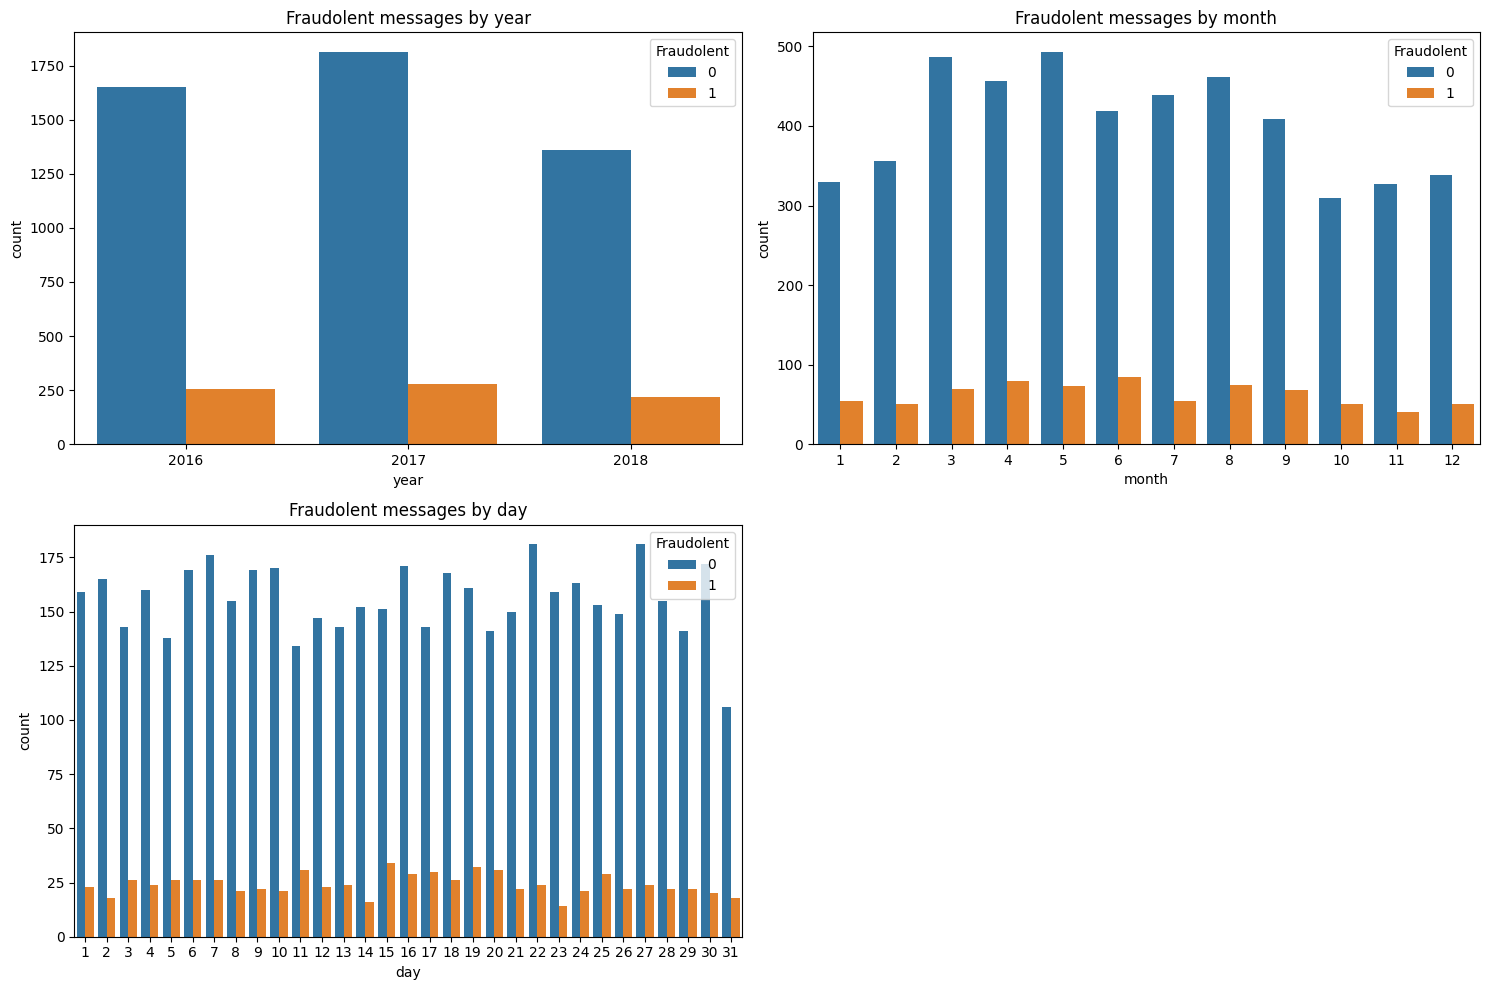

In [111]:
sms['Date and Time'] = pd.to_datetime(sms['Date and Time'])

# Extracting different time components
sms['year'] = sms['Date and Time'].dt.year
sms['month'] = sms['Date and Time'].dt.month
sms['day'] = sms['Date and Time'].dt.day


# Filtering for fraudulent messages
fraudulent_sms = sms[sms['Fraudolent'] == 1]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.delaxes(axes[1][1])
# Plot 1: Fraud percentage by year
sns.countplot(x='year', hue='Fraudolent', data=sms, ax=axes[0, 0])
axes[0, 0].set_title('Fraudolent messages by year')

# Plot 2: Fraud percentage by month
sns.countplot(x='month', hue='Fraudolent', data=sms, ax=axes[0, 1])
axes[0, 1].set_title('Fraudolent messages by month')

# Plot 4: Fraud percentage by day
sns.countplot(x='day', hue='Fraudolent', data=sms, ax=axes[1, 0])
axes[1, 0].set_title('Fraudolent messages by day')

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Show the plots
plt.show()


## **Simple model approach - Logistic Regression**
We implemented a basic model to compare its performance against the later used LLM.

### *Data Loading and Preparation*

The script starts by importing necessary libraries from `pandas` and `sklearn`.
It reads the SMS data from a *CSV file* into a *pandas DataFrame*.

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


df = pd.read_csv("dataset/sms.csv")

### *Text Vectorization*

A *TfidfVectorizer* is initialized, excluding English stop words - such as "the", "a", "is", "are".
The *'SMS test'* column is transformed into *TF-IDF features*, a numerical representation suitable for machine learning models.

In [113]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['SMS test'])


### *Target Variable*

The *'Fraudolent'* column is set as the *target variable y*.

In [114]:
y = df['Fraudolent']

### *Train-Test Split*

The dataset is split into *training* and *testing* sets, with *20%* of the data reserved for testing.
The random state is set for *reproducibility*.

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

### *Model Training*

A *Logistic Regression* model is instantiated and trained using the training data.

In [116]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### *Model Prediction and Evaluation*

The model makes *predictions* on the *test set*.
A *classification report* is printed, showing key metrics like *precision*, *recall*, and *F1-score* for evaluating the model's *performance* on detecting fraudulent SMS messages.

In [117]:
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.98      0.70      0.82       149

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



## **SMOTE Resampling**

The *SMOTE method* from `imblearn.over_sampling` is used to handle *class imbalance*.

`smote = SMOTE(random_state=42)` creates a *SMOTE object* with a *fixed random state* for reproducibility.

`X_resampled, y_resampled = smote.fit_resample(X, df['Fraudolent'])` applies SMOTE to the *feature matrix `X`* and *target vector* `df['Fraudolent']`. This results in a *balanced dataset* by creating *synthetic samples* for the *minority class*.

In [118]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, df['Fraudolent'])

### *Train-Test Split*

`train_test_split from sklearn.model_selection` is used to *split the data* into training and testing sets.

`X_resampled` and `y_resampled` are split into *training* (`X_train, y_train`) and *testing* (`X_test, y_test`) sets, with 20% of the data held out for testing.

`stratify=y_resampled` ensures that the *proportion of classes* in both the training and testing sets reflects the proportion in the *resampled dataset*, which is important for *maintaining balance* in both sets.

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

### *Model Training*

A `LogisticRegression` model `from sklearn.linear_model` is instantiated.

`model.fit(X_train, y_train)` *trains* the logistic regression model on the training data. This step involves the model learning to *differentiate between classes* based on the features provided.

In [120]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### *Model Prediction and Evaluation*

`predictions = model.predict(X_test)` uses the trained model to *predict the class labels* for the test set.

`print(classification_report(y_test, predictions))` prints a *classification report* that includes key metrics like *precision*, *recall*, and *F1-score* for each class. These metrics are crucial for evaluating the model's *performance*, especially in a *balanced dataset* scenario where accuracy alone is not a sufficient measure.

In [121]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.99      0.99      0.99       965

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



## **LLM (Language Model) Approach**

We started by loading and testing the base model, using **LLaMA-Factory** and **LM-Studio**, to assure easy *reproducibility*:
  - *evaluated* the model on the SMS data (test set).
  - *extracted metrics* (accuracy, precision, recall, F1-Score) and *confusion matrix*, in addition to "JSON output" evaluation.


We *fine-tuned* the model using the training set, prompt "x" and same parameters as the base model, assessing improvements needed.


*Converted* the model *to GGUF* for easier *CPU inference* and to make the model more "computationally friendly", so it can be run on 3rd party services too, like LM Studio.

Created *two versions* of the model:
  - **F16** (*16-bit precision*) which is the *default fine-tuned* version.
  - **Q8** (*8-bit precision*) which is a *quantized version* of the fine-tuned model, to make it even more "computationally friendly" but a little less reliable.

*Uploaded* everything to **Hugging Face** for easy access and reproducibility.

### *Parameters & Choices*

In [122]:
# Parameters used consistently during test, fine-tuning and final run.
# Could have played more with it, but for efficiency purposes, we decided to stick with these.

temperature = 0.3
max_tokens = 128

## **LM Studio - easy inference**

### *Requirements*
- **LM Studio**
- LM Studio's **server** running on "http://localhost:1234/v1" or any other easy accessible address

We aim to obtain the result in *JSON format*, which is a common data format widely used in *data handling*. The expected output should look like this:

```json
{
    "is_fraudulent": true
}
```

```json
{
    "is_fraudulent": false
}
```

The language model categorizes the sms as *fraudulent or not*.

This is done by a combination of:
- prompt engineering
- fine-tuning
- hyperparameter optimization
- function-calling/JSON outputs

*Run inference* on API - LM Studio (mimics OpenAI API).

### *Base Implementation*

In [123]:
# Prompt used for the task

INSTRUCTIONS = """You are excellent message moderator, expert in detecting fraudulent messages.

You will be given "Messages" and your job is to predict if a message is fraudulent or not.

You ONLY respond FOLLOWING this json schema:

{
    "is_fraudulent": {
        "type": "boolean",
        "description": "Whether the message is predicted to be fraudulent."
    }
}

You MUST ONLY RESPOND with a boolean value in JSON. Either true or false in JSON. NO EXPLANATIONS OR COMMENTS.

Example of valid responses:
{
    "is_fraudulent": true
}
or 
{
    "is_fraudulent": false
}
"""
# After a small test this was the only one that didn't yield immediate terrible results for both JSON and task performance

### *Full process as a function*

*Run* inference, get *JSON output*, and save the *result* (with *error handling*).

`user_query` is passed to the `predict_fraudolence` function, which uses the LLM to *predict* whether the message is *fraudolent or not*.

In [124]:
import json
from openai import OpenAI
from typing import Optional

local_server = "http://localhost:1234/v1"
client = OpenAI(base_url=local_server, api_key="sk_1234567890")

# Choose which system message to use based on whether you want a confidence score
system_message = INSTRUCTIONS
def predict_fraudulence(user_query):
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": system_message},
                {"role": "user", "content": user_query},
            ]
        )
        prediction_content = response.choices[0].message.content
        prediction_json = json.loads(prediction_content)
        
        # Validate the prediction JSON
        if "is_fraudulent" in prediction_json and \
            (type(prediction_json["is_fraudulent"]) == bool):
            return prediction_json
        else:
            raise ValueError(f"Invalid JSON structure from prediction: {prediction_content}")
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


`user_query` is a variable set to a *specific text message*, you can change it to any other message to play around with it.

In [125]:
# Run prediction
user_query = "Hi Chris! Can you send me $1,000,000? I need it for a school project. Thanks!"
prediction_json = predict_fraudulence(user_query)

if prediction_json:
    print(prediction_json)
else:
    print("Failed to get a valid prediction.")

{'is_fraudulent': True}


`prediction_json` calls the function and the user query and *returns the output*.

In [126]:
prediction_json["is_fraudulent"]

True

## LLaMA-Factory - fine-tuning

### Requirements
- Install LLaMA-Factory (through git clone or the requirements.txt file)

### Run Web Interface
We used LLAMA-Factory's Web Interface to fine-tune the model, running the "train_web.py" script.

```cmd
cd llama-factory
python src/train_web.py
```

(Images of the Web Interface are in the README and "Images" folder)

## Evaluating Results from LLM
Open the file with the model predictions (and the correct labels) and run the following code to obtain the metrics.

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display
import json

# Load the generated predictions file
predictions_file_path = 'final_model_eval/fine_tuned_generated_predictions.jsonl'
with open(predictions_file_path, 'r') as file:
    predictions = [json.loads(line) for line in file]

# Display the first few entries to understand the structure
display(predictions[:5])

# Extracting labels and predictions
labels = [json.loads(entry['label'])['is_fraudulent'] for entry in predictions]
predicts = [json.loads(entry['predict'])['is_fraudulent'] for entry in predictions]

# Converting boolean to integer for metrics calculation
labels = [int(label) for label in labels]
predicts = [int(predict) for predict in predicts]

# Calculating metrics
accuracy = accuracy_score(labels, predicts)
precision = precision_score(labels, predicts)
recall = recall_score(labels, predicts)
f1 = f1_score(labels, predicts)

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1"],
    "Value" : [accuracy, precision, recall, f1]
})

display(metrics_df)


[{'label': '{"is_fraudulent": false}', 'predict': '{"is_fraudulent": false}'},
 {'label': '{"is_fraudulent": false}', 'predict': '{"is_fraudulent": false}'},
 {'label': '{"is_fraudulent": false}', 'predict': '{"is_fraudulent": false}'},
 {'label': '{"is_fraudulent": true}', 'predict': '{"is_fraudulent": true}'},
 {'label': '{"is_fraudulent": false}', 'predict': '{"is_fraudulent": false}'}]

,Metric,Value
0,Accuracy,0.993722
1,Precision,0.986301
2,Recall,0.966443
3,F1,0.976271


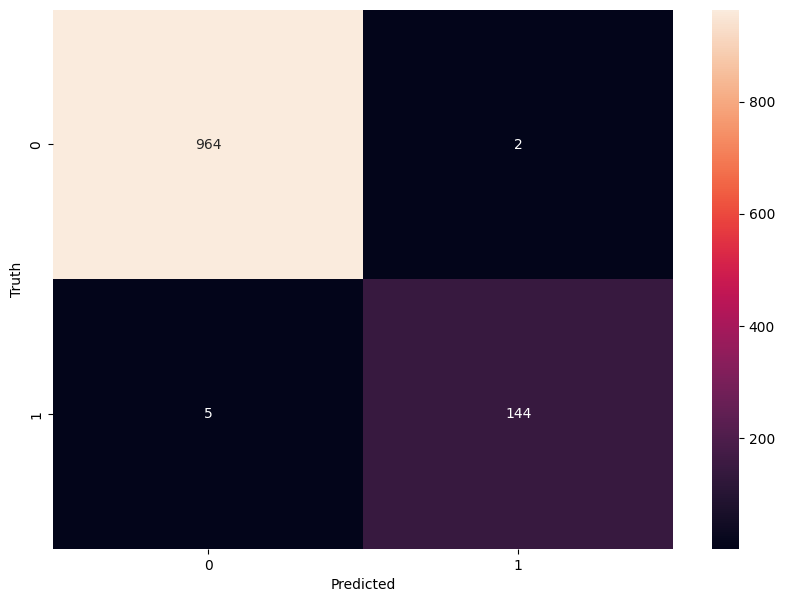

In [128]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(labels, predicts)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

## **FROM PYTORCH TO GGUF**

Python is a *poor choice* for *AI inference stacks*; in production systems, we would want to *remove* the reliance on PyTorch and Python.\
With the aid of programs like `llama.cpp`, *GGUF* may facilitate extremely effective zero-Python inference, running on CPU.

After having installed the repository with the following command in the terminal:

`git clone https://github.com/ggerganov/llama.cpp`

`cd llama.cpp`

We then use the command `convert.py` to convert the *PYTORCH model to GGUF*, simply by giving the path containing the PYTORCH files. The GGUF model file is a *16-bit floating point model*.

`python convert.py ./model/zephyr-fraudulence-detector`

With the help of the `mkDev64build` application we built the *quantizer* by giving it the fine-tuned model and selecting the type of quatization we wanted (*8-bit*).
All these models are accessible in our [**HuggingFace**](https://huggingface.co/SimplyLeo/Zephyr-Fraudulence-Detector) repository. 